In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
image_size=224
batch_size=24
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "newdataset/train",
    image_size=(image_size,image_size),
    batch_size=batch_size
)
test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "newdataset/valid",
    image_size=(image_size,image_size),
    batch_size=batch_size
)

Found 18345 files belonging to 10 classes.
Found 4585 files belonging to 10 classes.


In [3]:
class_names=dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [4]:
len(dataset)

765

In [5]:
def partitions(dataset,train_size=0.7,val_size=0.3,shuffle=True):
    if shuffle:
        dataset.shuffle(10000,seed=5)
    ds_size=len(dataset)
    train_size=int(ds_size*train_size)
    val_size=int(ds_size*val_size)
    train_ds=dataset.take(train_size)
    val_ds=dataset.skip(train_size).take(val_size)
    return train_ds,val_ds

In [6]:
train_ds,val_ds=partitions(dataset)

In [7]:
len(train_ds)

535

In [8]:
len(val_ds)

229

In [9]:
len(test_ds)

192

In [7]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
'''data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])'''

'data_augmentation=tf.keras.Sequential([\n    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),\n    layers.experimental.preprocessing.RandomRotation(0.2)\n])'

In [12]:
model=models.Sequential([
    resize_and_rescale,
    # data_augmentation,

    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(batch_size,224, 224, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',trainable=False),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same',trainable=False),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same',trainable=False),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same',trainable=False),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same',trainable=False),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same',trainable=False),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same',trainable=False),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])
model.build(input_shape=(batch_size,image_size,image_size,3))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (24, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (24, 224, 224, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (24, 224, 224, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (24, 112, 112, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (24, 112, 112, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (24, 112, 112, 128)       147584    
                                                      

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
history=model.fit(
    train_ds,
    epochs=30,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
401/401 [==============================] - 282s 699ms/step - loss: 2.1349 - accuracy: 0.1977 - val_loss: 1.6383 - val_accuracy: 0.4241
Epoch 2/30
401/401 [==============================] - 278s 694ms/step - loss: 1.2350 - accuracy: 0.5633 - val_loss: 0.9730 - val_accuracy: 0.6691
Epoch 3/30
401/401 [==============================] - 278s 694ms/step - loss: 0.7932 - accuracy: 0.7225 - val_loss: 0.6401 - val_accuracy: 0.7823
Epoch 4/30
401/401 [==============================] - 278s 694ms/step - loss: 0.6110 - accuracy: 0.7848 - val_loss: 0.6117 - val_accuracy: 0.7903
Epoch 5/30
401/401 [==============================] - 278s 694ms/step - loss: 0.5478 - accuracy: 0.8078 - val_loss: 0.5172 - val_accuracy: 0.8229
Epoch 6/30
401/401 [==============================] - 278s 693ms/step - loss: 0.4276 - accuracy: 0.8493 - val_loss: 0.6012 - val_accuracy: 0.8038
Epoch 7/30
401/401 [==============================] - 278s 693ms/step - loss: 0.3740 - accuracy: 0.8711 - val_loss: 0.3599 -

In [30]:
model.evaluate(test_ds)

144/144 [==============================] - 37s 252ms/step - loss: 0.2891 - accuracy: 0.9121


[0.2891250550746918, 0.9121046662330627]

In [31]:
model_version = 1
model.save(f"model_{model_version}")

INFO:tensorflow:Assets written to: model_1\assets


INFO:tensorflow:Assets written to: model_1\assets


In [14]:
model.compile(
    optimizer='adamax',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history=model.fit(
    train_ds,
    epochs=30,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
535/535 [==============================] - 279s 502ms/step - loss: 1.7312 - accuracy: 0.3401 - val_loss: 1.2205 - val_accuracy: 0.5715
Epoch 2/30
535/535 [==============================] - 266s 497ms/step - loss: 1.0025 - accuracy: 0.6501 - val_loss: 0.7963 - val_accuracy: 0.7198
Epoch 3/30
535/535 [==============================] - 267s 498ms/step - loss: 0.6803 - accuracy: 0.7634 - val_loss: 0.5806 - val_accuracy: 0.8004
Epoch 4/30
535/535 [==============================] - 266s 498ms/step - loss: 0.5064 - accuracy: 0.8221 - val_loss: 0.5445 - val_accuracy: 0.8062
Epoch 5/30
535/535 [==============================] - 266s 498ms/step - loss: 0.3922 - accuracy: 0.8612 - val_loss: 0.4742 - val_accuracy: 0.8284
Epoch 6/30
535/535 [==============================] - 267s 498ms/step - loss: 0.3383 - accuracy: 0.8808 - val_loss: 0.3598 - val_accuracy: 0.8805
Epoch 7/30
535/535 [==============================] - 266s 497ms/step - loss: 0.2780 - accuracy: 0.9041 - val_loss: 0.3655 -

In [16]:
model.evaluate(test_ds)

192/192 [==============================] - 36s 187ms/step - loss: 0.4883 - accuracy: 0.9069


[0.4883365333080292, 0.9068702459335327]

In [2]:
image_size=224
batch_size=24
test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "images",
    image_size=(image_size,image_size),
    batch_size=batch_size
)

Found 16011 files belonging to 10 classes.


In [3]:
class_names=test_ds.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [9]:
model=tf.keras.models.load_model("model_1")
#30 epochs

In [5]:
model.evaluate(test_ds)

668/668 [==============================] - 153s 206ms/step - loss: 0.1581 - accuracy: 0.9540


[0.1580841839313507, 0.9539691209793091]

In [6]:
model=tf.keras.models.load_model("model_1.2")
#40 epochs

In [5]:
model.evaluate(test_ds)

668/668 [==============================] - 139s 194ms/step - loss: 0.0940 - accuracy: 0.9751


[0.09398031234741211, 0.9751420617103577]

Found 4585 files belonging to 10 classes.
144/144 [==============================] - 70s 289ms/step


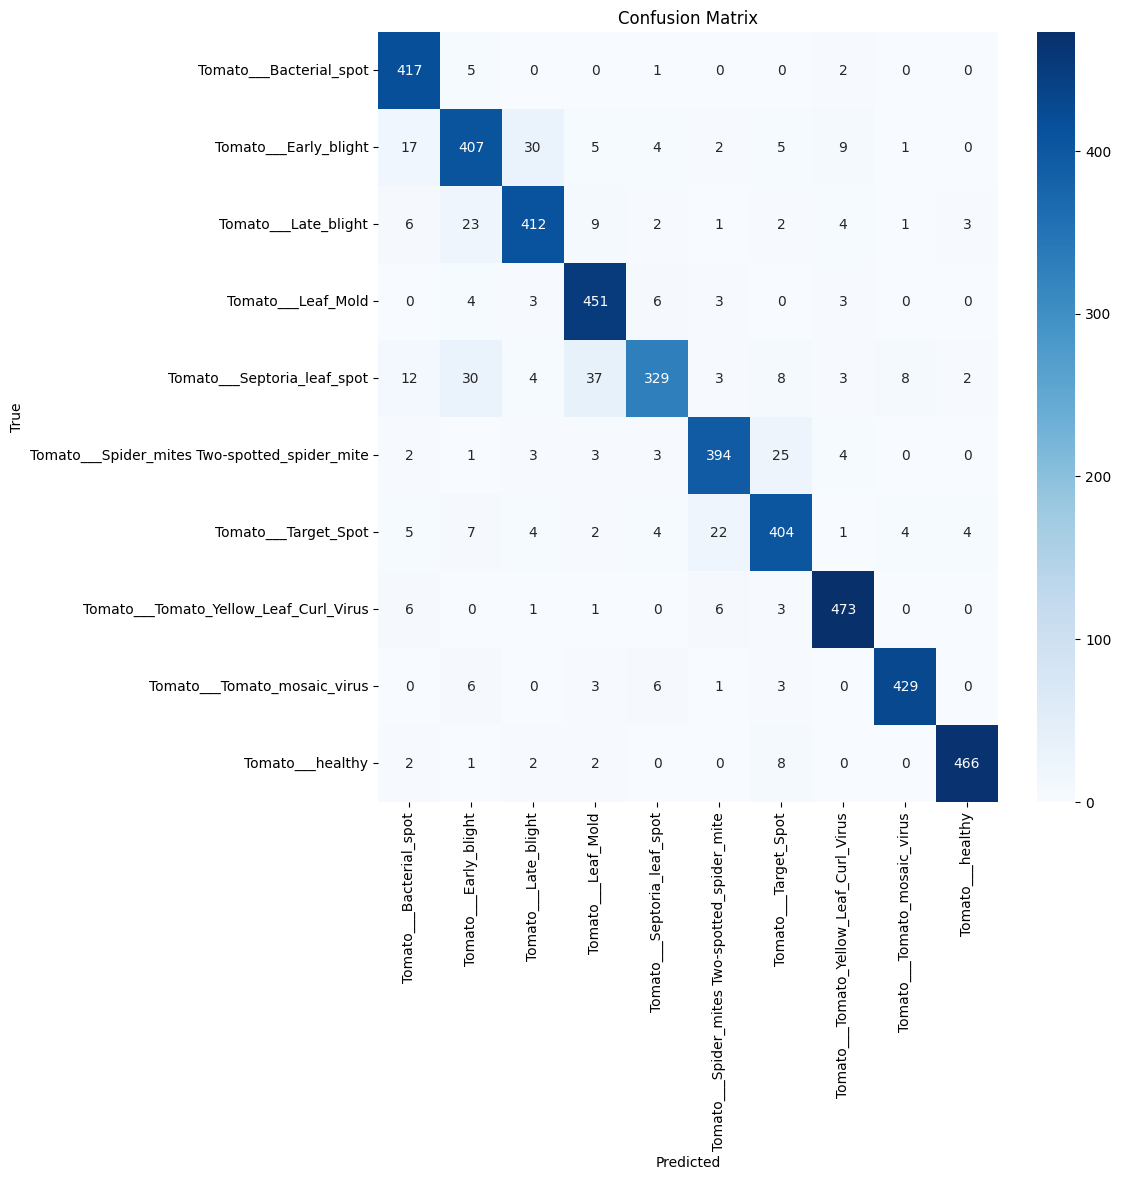

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

# Load the saved model
model = keras.models.load_model("model_1")
image_size=224
batch_size=32
# Assuming 'test_ds' is your test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "newdataset/valid",
    image_size=(image_size, image_size),
    batch_size=batch_size,
    shuffle=False  # Set to False to maintain order for confusion matrix
)

# Make predictions on the test set
predictions = model.predict(test_ds)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test set
true_labels = np.concatenate([y for x, y in test_ds], axis=0)

# Get class names if not already available
class_names = test_ds.class_names

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(len(class_names), len(class_names)))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Found 4585 files belonging to 10 classes.
144/144 [==============================] - 37s 260ms/step


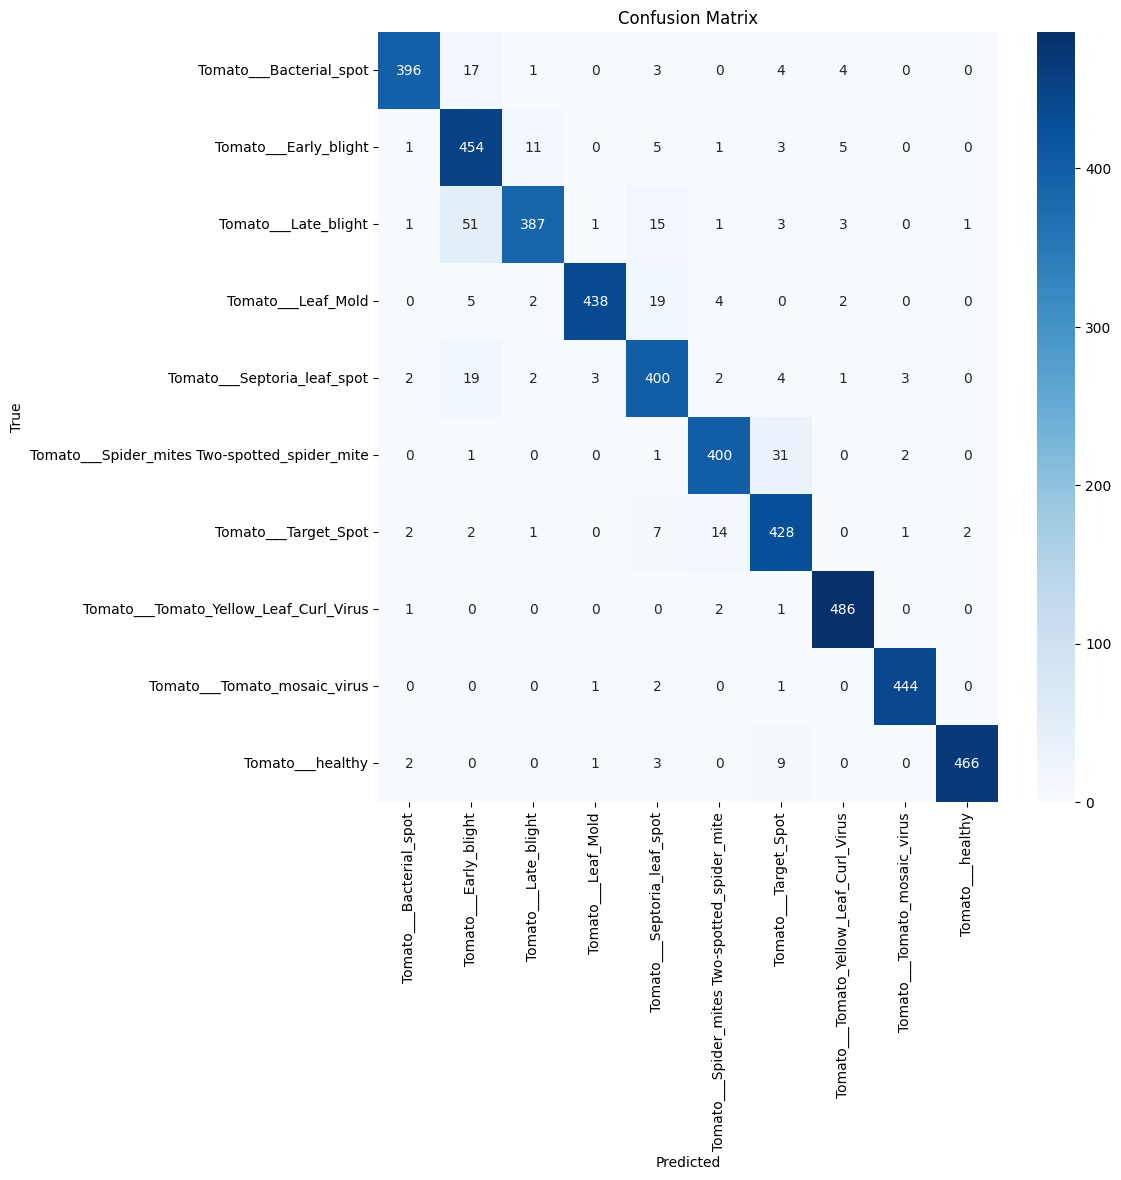

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

# Load the saved model
model = keras.models.load_model("model_1.2")
image_size=224
batch_size=32
# Assuming 'test_ds' is your test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "newdataset/valid",
    image_size=(image_size, image_size),
    batch_size=batch_size,
    shuffle=False  # Set to False to maintain order for confusion matrix
)

# Make predictions on the test set
predictions = model.predict(test_ds)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test set
true_labels = np.concatenate([y for x, y in test_ds], axis=0)

# Get class names if not already available
class_names = test_ds.class_names

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(len(class_names), len(class_names)))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
